In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local'
#path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn'
sys.path.insert(0,path_to_mavenn_local)

import mavenn
from mavenn.src.utils import get_example_dataset

In [2]:
#load_config = pd.read_csv('model_files/rnap-wt.csv', index_col=[0], keep_default_na=False)

In [3]:
NAR = mavenn.load('model_files/full-wt')

In [4]:
NAR.get_nn().summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay (None, 166)          0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 156)          0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
phiPrime (Dense)                (None, 1)            157         Sequence_only[0][0]              
__________________________________________________________________________________________________
phi (Dense)                     (None, 1)            2           phiPrime[0][0]                   
__________________________________________________________________________________________________
dense_1 (D

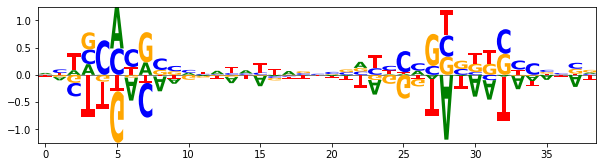

In [5]:
import logomaker
theta_df = pd.DataFrame(NAR.get_gpmap_parameters()['value'].values[1:].reshape(39,4),columns=['A','C','G','T'])
logomaker.Logo(-theta_df,center_values=False)

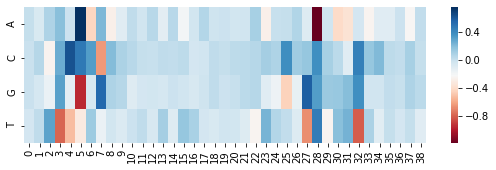

In [6]:
import seaborn as sns
plt.figure(figsize=(9,2.5))
sns.heatmap(-theta_df.T,cmap='RdBu')

In [7]:
phi_range = np.linspace(-4,9,500)
p_of_all_y_given_phi = NAR.na_p_of_all_y_given_phi(phi_range)

[Text(0.5, 0, '-4.0'), Text(20.5, 0, '2.'), Text(40.5, 0, '9.0')]

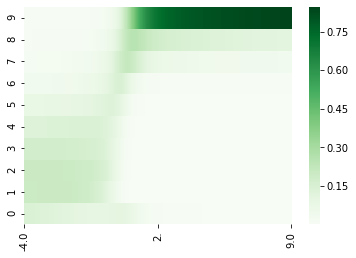

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
if p_of_all_y_given_phi.T[p_of_all_y_given_phi.T.shape[0]-1][0]>p_of_all_y_given_phi.T[p_of_all_y_given_phi.T.shape[0]-1][p_of_all_y_given_phi.T.shape[1]-1]:
    ax = sns.heatmap(pd.DataFrame(p_of_all_y_given_phi.T).loc[::1,::-1],cmap='Greens')
else:
    ax = sns.heatmap(p_of_all_y_given_phi.T,cmap='Greens')    
ax.invert_yaxis()
ax.set_xticks(([0,int(len(phi_range)/2),len(phi_range)-2]), minor=False)
middle_tick = str(phi_range[int(len(phi_range)/2)])
ax.set_xticklabels(([str(phi_range[0])[0:5],middle_tick[0:2],str(phi_range[len(phi_range)-1])[0:5]]), minor=False)

In [9]:
NAR.get_gpmap_parameters()

,name,value
0,theta_0,-4.564489
1,theta_0:A,-0.021423
2,theta_0:C,-0.006417
3,theta_0:G,-0.007339
4,theta_0:T,0.035180
...,...,...
152,theta_37:T,-0.020918
153,theta_38:A,-0.023729
154,theta_38:C,-0.019611
155,theta_38:G,-0.048184


In [10]:
NAR.na_p_of_all_y_given_phi(0.5)

array([[0.10657885, 0.0499321 , 0.07338066, 0.07396836, 0.08715986,
        0.12254292, 0.14480354, 0.14722082, 0.11247043, 0.08194242]],
      dtype=float32)

In [11]:
NAR.p_of_y_given_phi(2,0.5)

0.07338065654039383

In [12]:
#pd.DataFrame(p_of_all_y_given_phi.T).loc[::-1].to_csv('noise_model_df.csv')

In [14]:
#NAR.x_to_phi(['GGCTGTTCACTTTATGCTTCCGGCTTGTATTTTGTGTGC','GGCTGTTCACTTTATGCTTCCGGCTTGTATTTTGTGTGG'])

array([0.15088129, 0.12230873], dtype=float32)